In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('México.csv')

In [107]:
df.shape

(26401, 79)

In [108]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.47,NaN,f,9,4,2,0,0.39
2,56074,https://www.airbnb.com/rooms/56074,20250625031918,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,...,4.94,4.76,4.79,NaN,f,1,1,0,0,0.48
3,67703,https://www.airbnb.com/rooms/67703,20250625031918,2025-07-01,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.30
4,70644,https://www.airbnb.com/rooms/70644,20250625031918,2025-07-01,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,1450299137475327273,https://www.airbnb.com/rooms/1450299137475327273,20250625031918,2025-07-01,city scrape,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,170416107,...,5.00,4.00,5.00,NaN,t,1,1,0,0,1.00
26397,1450300528106131951,https://www.airbnb.com/rooms/1450300528106131951,20250625031918,2025-06-26,city scrape,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,358250534,...,NaN,NaN,NaN,NaN,t,14,14,0,0,NaN
26398,1450345027980478127,https://www.airbnb.com/rooms/1450345027980478127,20250625031918,2025-07-01,city scrape,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,594251711,...,NaN,NaN,NaN,NaN,f,6,3,3,0,NaN
26399,1450394952972090126,https://www.airbnb.com/rooms/1450394952972090126,20250625031918,2025-07-01,city scrape,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,24161895,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [109]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3373
Length: 79, dtype: int64

In [110]:
#CONOCER EL PORCENTAJE DE MISSING VALUES POR COLUMNA
porcentaje_missing = (df.isna().mean() * 100).sort_values(ascending=False)
porcentaje_missing.head(44)

calendar_updated                100.000000
neighbourhood_group_cleansed    100.000000
license                         100.000000
host_neighbourhood               48.600432
neighbourhood                    47.085338
neighborhood_overview            47.085338
host_about                       42.562782
host_location                    23.624105
host_response_rate               17.749328
host_response_time               17.749328
host_acceptance_rate             13.673724
review_scores_communication      12.783607
review_scores_value              12.783607
review_scores_checkin            12.783607
review_scores_cleanliness        12.783607
review_scores_accuracy           12.783607
review_scores_location           12.783607
review_scores_rating             12.776031
last_review                      12.776031
first_review                     12.776031
reviews_per_month                12.776031
beds                             12.488163
bathrooms                        12.427560
estimated_r

In [111]:
df=df.drop(["calendar_updated","neighbourhood_group_cleansed","license"], axis=1)

In [112]:
porcentaje_missing = (df.isna().mean() * 100).sort_values(ascending=False)
porcentaje_missing.head(40)

host_neighbourhood             48.600432
neighborhood_overview          47.085338
neighbourhood                  47.085338
host_about                     42.562782
host_location                  23.624105
host_response_time             17.749328
host_response_rate             17.749328
host_acceptance_rate           13.673724
review_scores_communication    12.783607
review_scores_checkin          12.783607
review_scores_cleanliness      12.783607
review_scores_accuracy         12.783607
review_scores_value            12.783607
review_scores_location         12.783607
review_scores_rating           12.776031
reviews_per_month              12.776031
first_review                   12.776031
last_review                    12.776031
beds                           12.488163
bathrooms                      12.427560
price                          12.401045
estimated_revenue_l365d        12.401045
host_is_superhost               5.147532
has_availability                3.787735
bedrooms        

In [113]:
df["host_neighbourhood"]= df["host_neighbourhood"].fillna("NA")
df["neighborhood_overview"]= df["neighborhood_overview"].fillna("NA")
df["neighbourhood"]= df["neighbourhood"].fillna("NA")
df["host_about"]= df["host_about"].fillna("NA")

In [114]:
df["host_response_rate"].dtype


dtype('O')

In [115]:
df["host_acceptance_rate"].dtype

dtype('O')

In [116]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%", "").astype(float) / 100
df["host_response_rate"] = df["host_response_rate"].str.replace("%", "").astype(float) / 100


In [117]:
df["host_location"] =df["host_location"].fillna(method="bfill")
df["host_response_rate"] = df["host_response_rate"].fillna(df["host_response_rate"].median())
df["host_acceptance_rate"] = df["host_acceptance_rate"].fillna(df["host_acceptance_rate"].median())
df["review_scores_communication"] = df["review_scores_communication"].fillna(df["review_scores_communication"].median())
df["review_scores_checkin"] = df["review_scores_checkin"].fillna(df["review_scores_checkin"].median())
df["review_scores_cleanliness"] = df["review_scores_cleanliness"].fillna(df["review_scores_cleanliness"].mean())
df["review_scores_accuracy"] = df["review_scores_accuracy"].fillna(df["review_scores_accuracy"].mean())
df["review_scores_value"] = df["review_scores_value"].fillna(df["review_scores_value"].mean())
df["review_scores_location"] = df["review_scores_location"].fillna(df["review_scores_location"].mean())
df["review_scores_rating"] = df["review_scores_rating"].fillna(df["review_scores_rating"].mean())
df["reviews_per_month"]= df["reviews_per_month"].fillna("0")



/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/2306547607.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["host_location"] =df["host_location"].fillna(method="bfill")


In [118]:
df["reviews_per_month"].dtype

dtype('O')

In [119]:
df["reviews_per_month"] = df["reviews_per_month"].astype(float)
df["reviews_per_month"] = df["reviews_per_month"].round(0).astype(int)


In [120]:
porcentaje_missing = (df.isna().mean() * 100).sort_values(ascending=False)
porcentaje_missing.head(30)

host_response_time                              17.749328
first_review                                    12.776031
last_review                                     12.776031
beds                                            12.488163
bathrooms                                       12.427560
price                                           12.401045
estimated_revenue_l365d                         12.401045
host_is_superhost                                5.147532
has_availability                                 3.787735
bedrooms                                         3.499867
host_identity_verified                           3.461990
host_has_profile_pic                             3.461990
host_total_listings_count                        3.461990
host_listings_count                              3.461990
host_picture_url                                 3.461990
host_thumbnail_url                               3.461990
host_verifications                               3.461990
host_since    

In [121]:
df["host_response_time"].value_counts()
df.loc[1, "host_response_time"] = "within an hour"
df["host_response_time"] = df["host_response_time"].fillna(method="ffill")


/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/91198031.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["host_response_time"] = df["host_response_time"].fillna(method="ffill")


In [122]:
df["first_review"] = pd.to_datetime(df["first_review"])
df["last_review"] = pd.to_datetime(df["last_review"])


In [123]:
df["reviews_per_month"]= df["reviews_per_month"].fillna("0")
df["beds"]= df["beds"].fillna(df["beds"].median())
df["bedrooms"]= df["bedrooms"].fillna(df["bedrooms"].median())
df["bathrooms"]= df["bathrooms"].fillna(df["bathrooms"].median())

In [124]:
df["price"] = df["price"].str.replace("$", "", regex=False).str.replace(",", "").astype(float)


In [125]:
porcentaje_missing = (df.isna().mean() * 100).sort_values(ascending=False)
porcentaje_missing.head(15)

first_review                 12.776031
last_review                  12.776031
price                        12.401045
estimated_revenue_l365d      12.401045
host_is_superhost             5.147532
has_availability              3.787735
host_identity_verified        3.461990
host_has_profile_pic          3.461990
host_verifications            3.461990
host_listings_count           3.461990
host_picture_url              3.461990
host_thumbnail_url            3.461990
host_total_listings_count     3.461990
host_since                    3.461990
host_name                     3.246089
dtype: float64

In [126]:
df["price"]= df["price"].fillna("0")
df["estimated_revenue_l365d"]= df["estimated_revenue_l365d"].fillna("0")
df["first_review"]= df["first_review"].fillna("NA")
df["last_review"]= df["last_review"].fillna("NA")
df["host_is_superhost"] = df["host_is_superhost"].fillna(method="ffill")
df["has_availability"] = df["has_availability"].fillna(method="ffill")
df["host_identity_verified"] = df["host_identity_verified"].fillna(method="ffill")
df["host_has_profile_pic"] = df["host_has_profile_pic"].fillna(method="ffill")
df = df.drop(["host_verifications", "host_picture_url", "host_thumbnail_url", "bathrooms_text"], axis=1)



/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/450927857.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["host_is_superhost"] = df["host_is_superhost"].fillna(method="ffill")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/450927857.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["has_availability"] = df["has_availability"].fillna(method="ffill")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/450927857.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["host_identity_verified"] = df["host_identity_verified"].fillna(method="ffill")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/450927857.py:8: FutureWarning: Series.fillna with 'method' i

In [127]:
df["description"]= df["description"].fillna("0")
df["minimum_minimum_nights"] = df["minimum_minimum_nights"].fillna(method="ffill")
df["maximum_minimum_nights"] = df["maximum_minimum_nights"].fillna(method="ffill")
df["minimum_maximum_nights"] = df["minimum_maximum_nights"].fillna(method="ffill")
df["maximum_maximum_nights"] = df["maximum_maximum_nights"].fillna(method="ffill")
df["host_response_time"] = df["host_response_time"].fillna("Within an hour")

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/2276217579.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["minimum_minimum_nights"] = df["minimum_minimum_nights"].fillna(method="ffill")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/2276217579.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["maximum_minimum_nights"] = df["maximum_minimum_nights"].fillna(method="ffill")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/2276217579.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["minimum_maximum_nights"] = df["minimum_maximum_nights"].fillna(method="ffill")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_69801/2276217579.py:5: FutureWarning: Ser

In [128]:
df = df.drop([
    "id", "listing_url", "scrape_id", "last_scraped", "source", 
    "picture_url", "host_url", 
    "neighbourhood", 
    "calendar_last_scraped"
], axis=1)



In [129]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly',
       'estimat

In [130]:
df.isna().sum()
porcentaje_missing = (df.isna().mean() * 100).sort_values(ascending=False)
porcentaje_missing.head(5)

host_since                   3.461990
host_total_listings_count    3.461990
host_listings_count          3.461990
host_name                    3.246089
name                         0.000000
dtype: float64

In [131]:
df["host_since"] = df["host_since"].fillna("0")
df["host_total_listings_count"] = df["host_total_listings_count"].fillna("0")
df["host_listings_count"] = df["host_listings_count"].fillna("0")
df["host_name"] = df["host_name"].fillna("0")

In [132]:
df.isna().sum().sum()

np.int64(0)

OUTLIERS

In [133]:
df["price"] = (
    df["price"]
    .astype(str)                           # asegúrate de que sean strings
    .str.replace(r"[\$,]", "", regex=True) # elimina $ y comas de miles
    .str.strip()                           # elimina espacios
    .astype(float)                         # convierte a numérico
)

df["estimated_revenue_l365d"] = (
    df["estimated_revenue_l365d"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .str.strip()
    .astype(float)
)

In [134]:
df["price"].dtype

dtype('float64')

In [135]:
df["estimated_revenue_l365d"].dtype

dtype('float64')

In [136]:
df["price"].value_counts()

price
0.0       3274
450.0      148
900.0      114
600.0       97
855.0       97
          ... 
3110.0       1
2934.0       1
2408.0       1
2129.0       1
3162.0       1
Name: count, Length: 3958, dtype: int64

In [137]:
cuantitativas = df.select_dtypes(include=["int64", "float64"])
cualitativas = df.select_dtypes(include=["object", "category"])

In [138]:
columnas_a_mover = ["host_id", "latitude", "longitude", "host_response_rate", "host_acceptance_rate"]

# Agregar al dataframe cualitativo
cualitativas[columnas_a_mover] = cuantitativas[columnas_a_mover]

# Eliminar del dataframe cuantitativo
cuantitativas = cuantitativas.drop(columnas_a_mover, axis=1)


In [139]:
cuantitativas.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy',
       'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      d

<Figure size 1500x800 with 0 Axes>

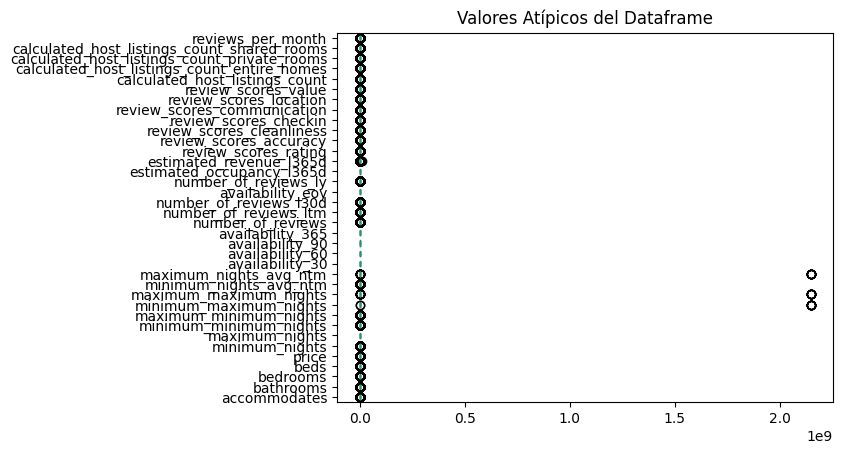

In [140]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [141]:
cuantitativas.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy',
       'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      d

PROCEDIMIENTO DE CUANTILES

In [142]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido accommodates                                         7.000
bathrooms                                            2.250
bedrooms                                             3.500
beds                                                 3.500
price                                             3092.000
minimum_nights                                       3.500
maximum_nights                                    2542.500
minimum_minimum_nights                               3.500
maximum_minimum_nights                               6.000
minimum_maximum_nights                            2265.000
maximum_maximum_nights                            2265.000
minimum_nights_avg_ntm                               5.750
maximum_nights_avg_ntm                            2265.000
availability_30                                     64.500
availability_60                                    114.000
availability_90                                    161.000
availability_365              

In [143]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,1.0,1.0,1.0,NaN,1.0,7,1.0,1.0,7.0,...,4.751745,4.92,4.92,4.840647,4.713399,1.0,1.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,1.0,180,1.0,1.0,180.0,...,4.700000,4.87,4.78,4.980000,4.470000,9.0,4.0,2.0,0.0,0.0
2,2.0,1.0,1.0,1.0,585.0,NaN,250,NaN,NaN,250.0,...,4.880000,4.98,4.94,4.760000,4.790000,1.0,1.0,0.0,0.0,0.0
3,4.0,1.0,2.0,2.0,1696.0,2.0,30,2.0,2.0,30.0,...,4.760000,4.94,4.92,4.980000,4.920000,2.0,2.0,0.0,0.0,0.0
4,2.0,1.0,1.0,1.0,1004.0,3.0,180,3.0,4.0,180.0,...,4.960000,4.96,4.98,4.960000,4.920000,3.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,6.0,1.0,2.0,3.0,1080.0,1.0,365,1.0,3.0,365.0,...,5.000000,NaN,5.00,NaN,5.000000,1.0,1.0,0.0,0.0,1.0
26397,2.0,1.0,1.0,1.0,982.0,1.0,365,1.0,1.0,365.0,...,4.751745,4.92,4.92,4.840647,4.713399,14.0,14.0,0.0,0.0,0.0
26398,4.0,1.0,2.0,2.0,1612.0,1.0,365,1.0,1.0,365.0,...,4.751745,4.92,4.92,4.840647,4.713399,6.0,3.0,3.0,0.0,0.0
26399,2.0,1.0,1.0,2.0,627.0,2.0,1125,2.0,2.0,1125.0,...,4.751745,4.92,4.92,4.840647,4.713399,1.0,1.0,0.0,0.0,0.0


In [144]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

accommodates                                    1286
bathrooms                                       2269
bedrooms                                         825
beds                                            2280
price                                           1837
minimum_nights                                  3466
maximum_nights                                     0
minimum_minimum_nights                          3238
maximum_minimum_nights                          2163
minimum_maximum_nights                            12
maximum_maximum_nights                            27
minimum_nights_avg_ntm                          2012
maximum_nights_avg_ntm                            26
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                               2159
number_of_reviews_ltm                         

In [145]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos.sum()

np.int64(55468)

In [146]:
data4_iqr = data3_iqr.copy()

# Columnas a rellenar con la mediana
cols_mediana = [
    "accommodates", "bathrooms", "bedrooms", "beds", "minimum_nights", 
    "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", 
    "minimum_maximum_nights", "maximum_maximum_nights", 
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"
]
data4_iqr[cols_mediana] = data4_iqr[cols_mediana].fillna(data4_iqr[cols_mediana].median().round(1))

In [147]:
excluir = [
    "accommodates", "bathrooms", "bedrooms", "beds", "minimum_nights", 
    "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", 
    "minimum_maximum_nights", "maximum_maximum_nights", 
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"
]

# Selección de todas las numéricas excepto las excluidas
cols_media = data4_iqr.select_dtypes(include="number").columns.difference(excluir)

# Rellenar esas columnas con la media
data4_iqr[cols_media] = data4_iqr[cols_media].fillna(data4_iqr[cols_media].mean().round(1))

In [148]:
data4_iqr

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,1.0,1.0,1.0,954.6,1.0,7,1.0,1.0,7.0,...,4.751745,4.92,4.92,4.840647,4.713399,1.0,1.0,0.0,0.0,0.0
1,2.0,1.0,1.0,1.0,954.6,1.0,180,1.0,1.0,180.0,...,4.700000,4.87,4.78,4.980000,4.470000,9.0,4.0,2.0,0.0,0.0
2,2.0,1.0,1.0,1.0,585.0,1.0,250,1.0,2.0,250.0,...,4.880000,4.98,4.94,4.760000,4.790000,1.0,1.0,0.0,0.0,0.0
3,4.0,1.0,2.0,2.0,1696.0,2.0,30,2.0,2.0,30.0,...,4.760000,4.94,4.92,4.980000,4.920000,2.0,2.0,0.0,0.0,0.0
4,2.0,1.0,1.0,1.0,1004.0,3.0,180,3.0,4.0,180.0,...,4.960000,4.96,4.98,4.960000,4.920000,3.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,6.0,1.0,2.0,3.0,1080.0,1.0,365,1.0,3.0,365.0,...,5.000000,4.90,5.00,4.900000,5.000000,1.0,1.0,0.0,0.0,1.0
26397,2.0,1.0,1.0,1.0,982.0,1.0,365,1.0,1.0,365.0,...,4.751745,4.92,4.92,4.840647,4.713399,14.0,14.0,0.0,0.0,0.0
26398,4.0,1.0,2.0,2.0,1612.0,1.0,365,1.0,1.0,365.0,...,4.751745,4.92,4.92,4.840647,4.713399,6.0,3.0,3.0,0.0,0.0
26399,2.0,1.0,1.0,2.0,627.0,2.0,1125,2.0,2.0,1125.0,...,4.751745,4.92,4.92,4.840647,4.713399,1.0,1.0,0.0,0.0,0.0


In [149]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,1.0,1.0,1.0,954.6,1.0,7,1.0,1.0,7.0,...,4.751745,4.92,4.92,4.840647,4.713399,1.0,1.0,0.0,0.0,0.0
1,2.9,1.2,1.4,1.5,954.6,1.0,180,1.0,1.0,180.0,...,4.700000,4.87,4.78,4.980000,4.470000,9.0,4.0,2.0,0.0,0.0
2,2.0,1.0,1.0,1.0,585.0,1.6,250,1.5,2.0,250.0,...,4.880000,4.98,4.94,4.760000,4.790000,1.0,1.0,0.0,0.0,0.0
3,4.0,1.0,2.0,2.0,1696.0,2.0,30,2.0,2.0,30.0,...,4.760000,4.94,4.92,4.980000,4.920000,2.0,2.0,0.0,0.0,0.0
4,2.0,1.0,1.0,1.0,1004.0,3.0,180,3.0,4.0,180.0,...,4.960000,4.96,4.98,4.960000,4.920000,3.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,6.0,1.0,2.0,3.0,1080.0,1.0,365,1.0,3.0,365.0,...,5.000000,4.90,5.00,4.900000,5.000000,1.0,1.0,0.0,0.0,1.0
26397,2.0,1.0,1.0,1.0,982.0,1.0,365,1.0,1.0,365.0,...,4.751745,4.92,4.92,4.840647,4.713399,14.0,14.0,0.0,0.0,0.0
26398,4.0,1.0,2.0,2.0,1612.0,1.0,365,1.0,1.0,365.0,...,4.751745,4.92,4.92,4.840647,4.713399,6.0,3.0,3.0,0.0,0.0
26399,2.0,1.0,1.0,2.0,627.0,2.0,1125,2.0,2.0,1125.0,...,4.751745,4.92,4.92,4.840647,4.713399,1.0,1.0,0.0,0.0,0.0


In [150]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data4_iqr.isnull().sum()
valores_nulos.sum()

np.int64(0)

In [151]:
data4_iqr["price"] = pd.to_numeric(data4_iqr["price"], errors="coerce")  
data4_iqr["price"] = data4_iqr["price"].replace(0, data4_iqr["price"].mean())


In [152]:
#data4_iqr["price"] = data4_iqr["price"].replace(0, round(data4_iqr["price"].median(),1))
data4_iqr["estimated_revenue_l365d"] = data4_iqr["estimated_revenue_l365d"].replace(0, round(data4_iqr["estimated_revenue_l365d"].median(),1))

In [153]:
df["estimated_revenue_l365d"].value_counts()

estimated_revenue_l365d
0.0         8010
395250.0      30
21600.0       30
307275.0      28
32400.0       27
            ... 
250452.0       1
370872.0       1
2094.0         1
93900.0        1
1722.0         1
Name: count, Length: 11567, dtype: int64

In [154]:
df["price"].value_counts()

price
0.0       3274
450.0      148
900.0      114
600.0       97
855.0       97
          ... 
3110.0       1
2934.0       1
2408.0       1
2129.0       1
3162.0       1
Name: count, Length: 3958, dtype: int64

<Figure size 1500x800 with 0 Axes>

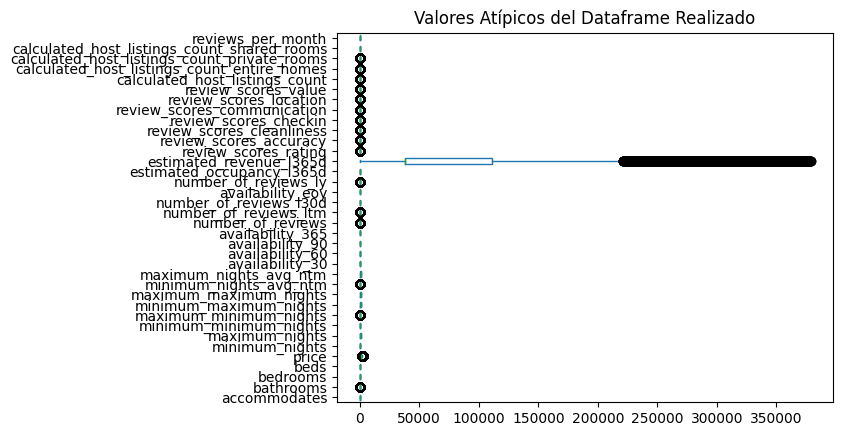

In [155]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
data4_iqr.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Realizado")
plt.show() #dibujamos el diagrama

In [156]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",Within an hour,f,NA,...,4.751745,4.92,4.92,4.840647,4.713399,1.0,1.0,0.0,0.0,0.0
1,Condesa Haus,A new concept of hosting in mexico through a b...,NA,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,f,Condesa,...,4.700000,4.87,4.78,4.980000,4.470000,9.0,4.0,2.0,0.0,0.0
2,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a few hours,f,San Rafael,...,4.880000,4.98,4.94,4.760000,4.790000,1.0,1.0,0.0,0.0,0.0
3,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NA,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within a few hours,f,Hipódromo,...,4.760000,4.94,4.92,4.980000,4.920000,2.0,2.0,0.0,0.0,0.0
4,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,t,Coyoacán,...,4.960000,4.96,4.98,4.960000,4.920000,3.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NA,Vicente,2018-01-28,"Mexico City, Mexico","Soy profesionista, mido 1.80, peso 90 kilos,",within an hour,f,costa azul,...,5.000000,4.90,5.00,4.900000,5.000000,1.0,1.0,0.0,0.0,1.0
26397,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NA,Inperio,2020-07-24,"Mexico City, Mexico",Hello! I am a marketing specialist. I work for...,within an hour,f,Colonia Renacimiento,...,4.751745,4.92,4.92,4.840647,4.713399,14.0,14.0,0.0,0.0,0.0
26398,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NA,Guadalupe,2024-08-04,"Mexico City, Mexico","Me encanta conocer gente, viví desde joven fue...",within an hour,t,Roma Norte,...,4.751745,4.92,4.92,4.840647,4.713399,6.0,3.0,3.0,0.0,0.0
26399,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NA,Alexis,2014-11-25,"Mexico City, Mexico","Hi! I'm Alexis, originally from CDMX and passi...",within an hour,f,San Rafael,...,4.751745,4.92,4.92,4.840647,4.713399,1.0,1.0,0.0,0.0,0.0


In [157]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos.sum().sum()

np.int64(0)

In [158]:
Datos_limpios.to_csv("México_sin_nulos_ni_outliers.csv", index=False)  

REGRESIÓN LINEAL SIMPLE

Analizar la correlación que existe en cada tipo de habitación (Elegir 4 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.


“host_acceptance_rate vs host_response_rate”

“review_scores_rating vs calculated_host_listings_count”

“host_acceptance_rate vs price”

“availability_365 vs number_of_reviews”

“host_acceptance_rate vs number_of_reviews ”

“reviews_per_month vs review_scores_communication”



In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df["room_type"].value_counts()

room_type
Entire home/apt    17235
Private room        8867
Shared room          208
Hotel room            91
Name: count, dtype: int64

In [161]:
Entire_home_apt = df[df["room_type"] == "Entire home/apt"]
Private_room = df[df["room_type"] == "Private room"]
Shared_room = df[df["room_type"] == "Shared room"]
Hotel_room = df[df["room_type"] == "Hotel room"]

In [162]:
Corr_Entire_home_apt=Entire_home_apt.corr(numeric_only=True).abs()
Corr_Private_room=Private_room.corr(numeric_only=True).abs()
Corr_Shared_room=Shared_room.corr(numeric_only=True).abs()
Corr_Hotel_room=Hotel_room.corr(numeric_only=True).abs()

In [163]:
#CORRELACIONES ENTRE HOST_ACCEPTANCE_RATE Y HOST_RESPONSE_RATE

correlaciones1 = {
    "Entire_home_apt": Entire_home_apt["host_acceptance_rate"].corr(Entire_home_apt["host_response_rate"]),
    "Private_room": Private_room["host_acceptance_rate"].corr(Private_room["host_response_rate"]),
    "Shared_room": Shared_room["host_acceptance_rate"].corr(Shared_room["host_response_rate"]),
    "Hotel_room": Hotel_room["host_acceptance_rate"].corr(Hotel_room["host_response_rate"])
}

tabla_corr1 = pd.DataFrame.from_dict(correlaciones1, orient="index", columns=["Correlación"])
print(tabla_corr1)


                 Correlación
Entire_home_apt     0.511165
Private_room        0.525497
Shared_room         0.432685
Hotel_room         -0.091053


In [164]:
#CORRELACIONES ENTRE HOST_ACCEPTANCE_RATE Y PRICE

correlaciones2 = {
    "Entire_home_apt": Entire_home_apt["host_acceptance_rate"].corr(Entire_home_apt["price"]),
    "Private_room": Private_room["host_acceptance_rate"].corr(Private_room["price"]),
    "Shared_room": Shared_room["host_acceptance_rate"].corr(Shared_room["price"]),
    "Hotel_room": Hotel_room["host_acceptance_rate"].corr(Hotel_room["price"])
}

tabla_corr2 = pd.DataFrame.from_dict(correlaciones2, orient="index", columns=["Correlación"])
print(tabla_corr2)


                 Correlación
Entire_home_apt    -0.032715
Private_room        0.009974
Shared_room        -0.040370
Hotel_room          0.153620


In [165]:
#CORRELACIONES ENTRE HOST_ACCEPTANCE_RATE Y NUMBER_OF_REVIEWS

correlaciones3 = {
    "Entire_home_apt": Entire_home_apt["number_of_reviews"].corr(Entire_home_apt["host_response_rate"]),
    "Private_room": Private_room["number_of_reviews"].corr(Private_room["host_response_rate"]),
    "Shared_room": Shared_room["number_of_reviews"].corr(Shared_room["host_response_rate"]),
    "Hotel_room": Hotel_room["number_of_reviews"].corr(Hotel_room["host_response_rate"])
}

tabla_corr3 = pd.DataFrame.from_dict(correlaciones3, orient="index", columns=["Correlación"])
print(tabla_corr3)


                 Correlación
Entire_home_apt     0.110666
Private_room        0.104493
Shared_room         0.004891
Hotel_room         -0.044102


In [166]:
#CORRELACIONES ENTRE REVIEW_SCORES_RATING Y CALCULATED_HOST_LISTINGS_COUNT

correlaciones4 = {
    "Entire_home_apt": Entire_home_apt["review_scores_rating"].corr(Entire_home_apt["calculated_host_listings_count"]),
    "Private_room": Private_room["review_scores_rating"].corr(Private_room["calculated_host_listings_count"]),
    "Shared_room": Shared_room["review_scores_rating"].corr(Shared_room["calculated_host_listings_count"]),
    "Hotel_room": Hotel_room["review_scores_rating"].corr(Hotel_room["calculated_host_listings_count"])
}

tabla_corr4 = pd.DataFrame.from_dict(correlaciones4, orient="index", columns=["Correlación"])
print(tabla_corr4)


                 Correlación
Entire_home_apt    -0.129326
Private_room       -0.145887
Shared_room        -0.281058
Hotel_room         -0.057946


In [167]:
#CORRELACIONES ENTRE AVAILABILITY_365 Y NUMBER_OF_REVIEWS

correlaciones5 = {
    "Entire_home_apt": Entire_home_apt["availability_365"].corr(Entire_home_apt["number_of_reviews"]),
    "Private_room": Private_room["availability_365"].corr(Private_room["number_of_reviews"]),
    "Shared_room": Shared_room["availability_365"].corr(Shared_room["number_of_reviews"]),
    "Hotel_room": Hotel_room["availability_365"].corr(Hotel_room["number_of_reviews"])
}

tabla_corr5 = pd.DataFrame.from_dict(correlaciones5, orient="index", columns=["Correlación"])
print(tabla_corr5)


                 Correlación
Entire_home_apt     0.031759
Private_room        0.061530
Shared_room        -0.273917
Hotel_room          0.117108


In [168]:
#CORRELACIONES ENTRE REVIEWS_PER_MONTH Y REVIEW_SCORES_COMMUNICATION

correlaciones6 = {
    "Entire_home_apt": Entire_home_apt["reviews_per_month"].corr(Entire_home_apt["review_scores_communication"]),
    "Private_room": Private_room["reviews_per_month"].corr(Private_room["review_scores_communication"]),
    "Shared_room": Shared_room["reviews_per_month"].corr(Shared_room["review_scores_communication"]),
    "Hotel_room": Hotel_room["reviews_per_month"].corr(Hotel_room["review_scores_communication"])
}

tabla_corr6 = pd.DataFrame.from_dict(correlaciones6, orient="index", columns=["Correlación"])
print(tabla_corr6)

                 Correlación
Entire_home_apt     0.062711
Private_room        0.032691
Shared_room         0.017201
Hotel_room          0.033668


GRAFICAR CORRELACIÓN CON MAYOR DISPERISÓN

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

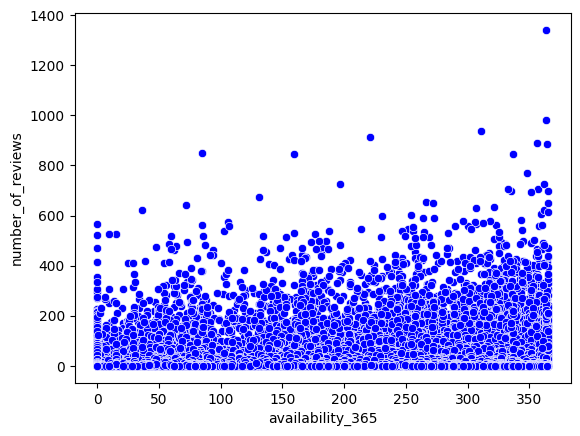

In [169]:

from turtle import color


sns.scatterplot(x='availability_365', y='number_of_reviews', color="blue", data=Entire_home_apt)

#sns.scatterplot(x='speeding', y='total', color="red", data=df)
#sns.scatterplot(x='no_previous', y='total', color="yellow", data=df)

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

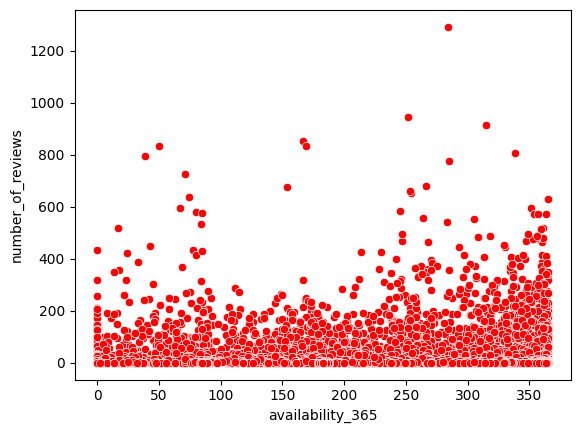

In [170]:
sns.scatterplot(x='availability_365', y='number_of_reviews', color="red", data=Private_room)


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

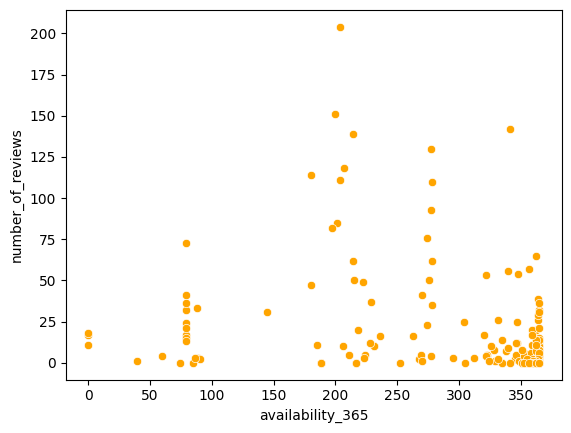

In [171]:
sns.scatterplot(x='availability_365', y='number_of_reviews', color="orange", data=Shared_room)


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

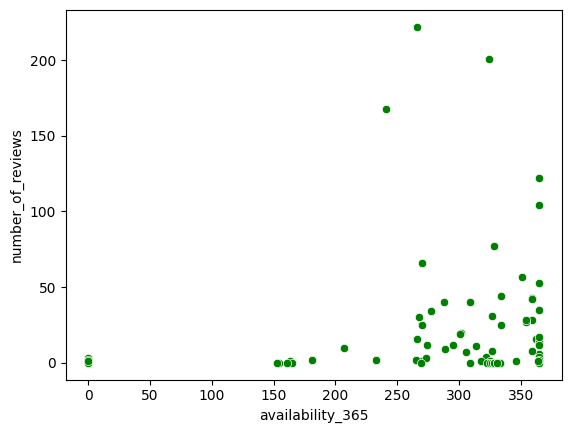

In [172]:
sns.scatterplot(x='availability_365', y='number_of_reviews', color="green", data=Hotel_room)

CORRELACIONES

“host_acceptance_rate vs host_response_rate”
Entire home/apt       
Private room          
Shared room           
Hotel room            0.091053


“review_scores_rating vs calculated_host_listings_count”
Entire home/apt       
Private room          
Shared room           
Hotel room            


“host_acceptance_rate vs price”
Entire home/apt       
Private room          
Shared room           
Hotel room            


“availability_365 vs number_of_reviews”
Entire home/apt       
Private room          
Shared room           
Hotel room            


“host_acceptance_rate vs number_of_reviews ”
Entire home/apt       
Private room          
Shared room           
Hotel room            


“reviews_per_month vs review_scores_communication”
Entire home/apt       
Private room          
Shared room           
Hotel room            


Crear una tabla de las 10 variables con mayor correlación (apoyándote de la herramienta Heatmap) para cada tipo de alojamiento elegido.


In [173]:
import numpy as np
import pandas as pd

subsets = {
    "Entire_home_apt": Entire_home_apt,
    "Private_room": Private_room,
    "Shared_room": Shared_room,
    "Hotel_room": Hotel_room
}

def top10_corr(df):
    # Solo columnas numéricas
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        return pd.DataFrame(columns=["Variable_1","Variable_2","Abs_Correlación"])
    
    corr = num.corr(method="pearson")
    corr_abs = corr.abs()

    # Eliminar duplicados (triángulo superior + diagonal)
    mask = np.triu(np.ones_like(corr_abs, dtype=bool))
    corr_pairs = corr_abs.mask(mask).stack().sort_values(ascending=False)

    # Tomar las 10 más altas
    top10 = corr_pairs.head(15).reset_index()
    top10.columns = ["Variable_1", "Variable_2", "Abs_Correlación"]
    return top10

# Mostrar las tablas para cada subset
top10_dict = {}
for name, sub in subsets.items():
    print("\n" + "="*80)
    print(f"Top 10 correlaciones absolutas - {name}")
    print("="*80)
    top10 = top10_corr(sub)
    top10_dict[name] = top10
    display(top10)


Top 10 correlaciones absolutas - Entire_home_apt


,Variable_1,Variable_2,Abs_Correlación
0,maximum_nights_avg_ntm,maximum_maximum_nights,1.000000
1,maximum_nights_avg_ntm,minimum_maximum_nights,1.000000
2,maximum_maximum_nights,minimum_maximum_nights,1.000000
3,calculated_host_listings_count_entire_homes,calculated_host_listings_count,0.997820
4,minimum_nights_avg_ntm,minimum_minimum_nights,0.989624
5,minimum_nights_avg_ntm,maximum_minimum_nights,0.985168
6,availability_90,availability_60,0.967741
7,maximum_minimum_nights,minimum_minimum_nights,0.966481
8,minimum_nights_avg_ntm,minimum_nights,0.931672
9,minimum_minimum_nights,minimum_nights,0.920938



Top 10 correlaciones absolutas - Private_room


,Variable_1,Variable_2,Abs_Correlación
0,minimum_nights_avg_ntm,minimum_minimum_nights,0.998763
1,minimum_nights_avg_ntm,minimum_nights,0.993346
2,minimum_minimum_nights,minimum_nights,0.992548
3,maximum_nights_avg_ntm,minimum_maximum_nights,0.984495
4,availability_90,availability_60,0.979783
5,maximum_nights_avg_ntm,maximum_maximum_nights,0.972469
6,availability_60,availability_30,0.947855
7,maximum_maximum_nights,minimum_maximum_nights,0.941815
8,calculated_host_listings_count_private_rooms,calculated_host_listings_count,0.924074
9,number_of_reviews_ly,number_of_reviews_ltm,0.910352



Top 10 correlaciones absolutas - Shared_room


,Variable_1,Variable_2,Abs_Correlación
0,minimum_minimum_nights,minimum_nights,1.000000
1,minimum_nights_avg_ntm,minimum_minimum_nights,0.999717
2,minimum_nights_avg_ntm,minimum_nights,0.999717
3,minimum_nights_avg_ntm,maximum_minimum_nights,0.988628
4,maximum_minimum_nights,minimum_minimum_nights,0.986685
5,maximum_minimum_nights,minimum_nights,0.986685
6,availability_90,availability_60,0.972604
7,estimated_revenue_l365d,estimated_occupancy_l365d,0.932916
8,availability_60,availability_30,0.931289
9,review_scores_accuracy,review_scores_rating,0.928382



Top 10 correlaciones absolutas - Hotel_room


,Variable_1,Variable_2,Abs_Correlación
0,estimated_occupancy_l365d,number_of_reviews_ltm,1.000000
1,minimum_nights_avg_ntm,maximum_minimum_nights,0.996213
2,minimum_minimum_nights,minimum_nights,0.994795
3,beds,bathrooms,0.992393
4,minimum_nights_avg_ntm,minimum_nights,0.988220
5,availability_90,availability_60,0.983763
6,minimum_nights_avg_ntm,minimum_minimum_nights,0.983388
7,maximum_minimum_nights,minimum_nights,0.975526
8,maximum_minimum_nights,minimum_minimum_nights,0.970917
9,availability_eoy,availability_90,0.968035



Top 10 correlaciones absolutas - Entire_home_apt


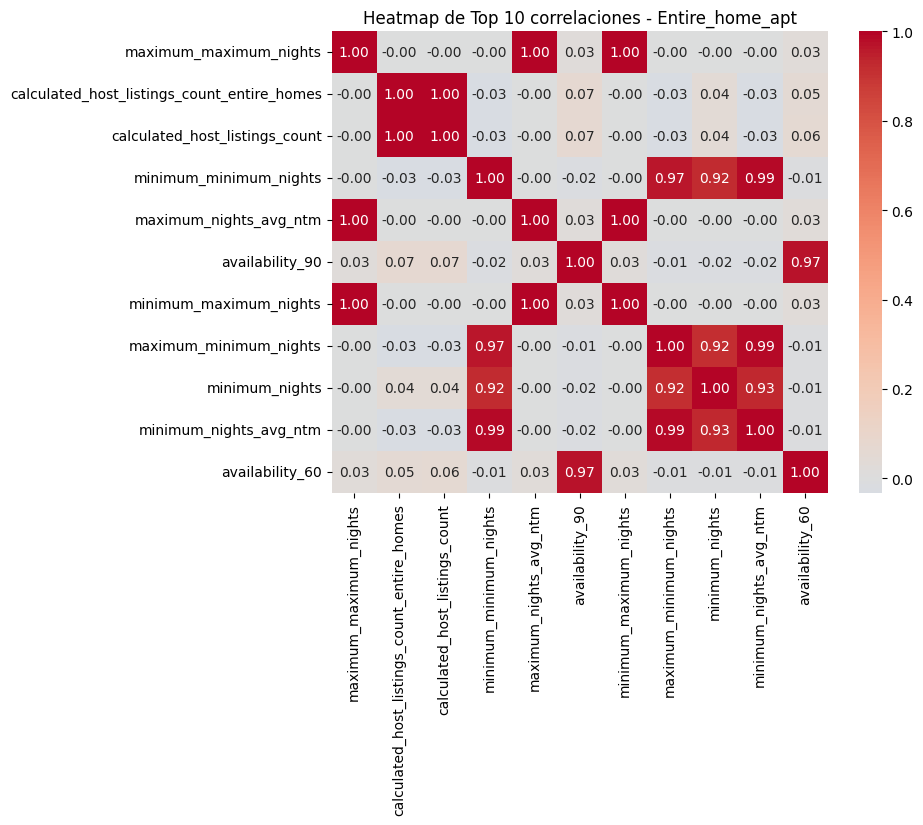


Top 10 correlaciones absolutas - Private_room


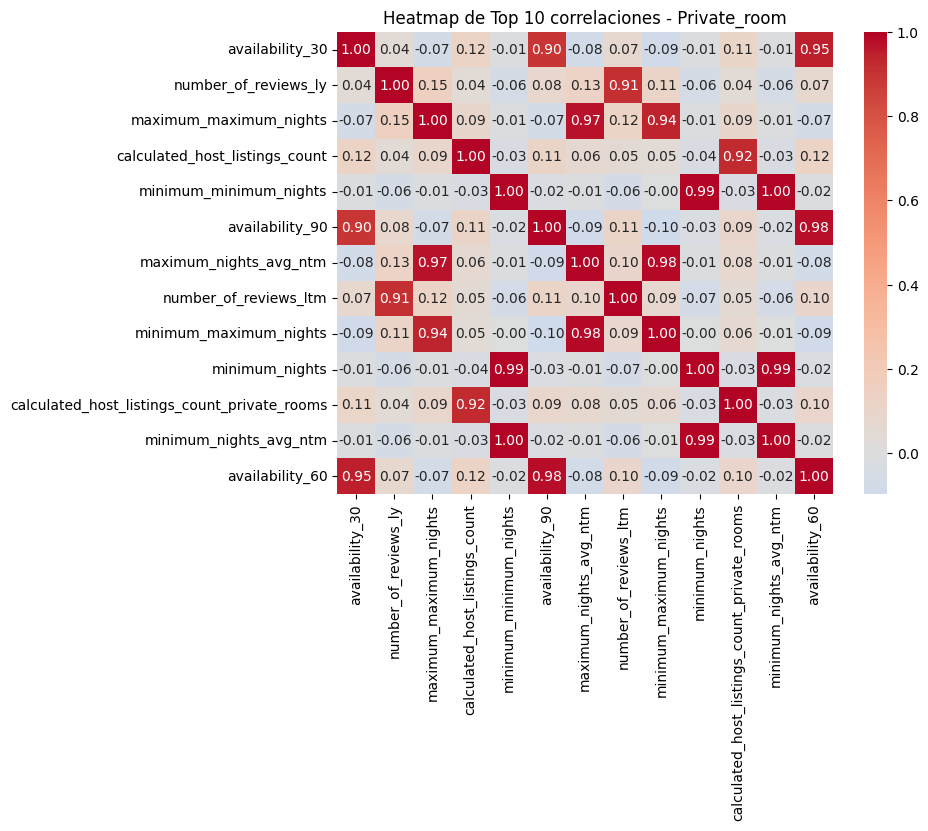


Top 10 correlaciones absolutas - Shared_room


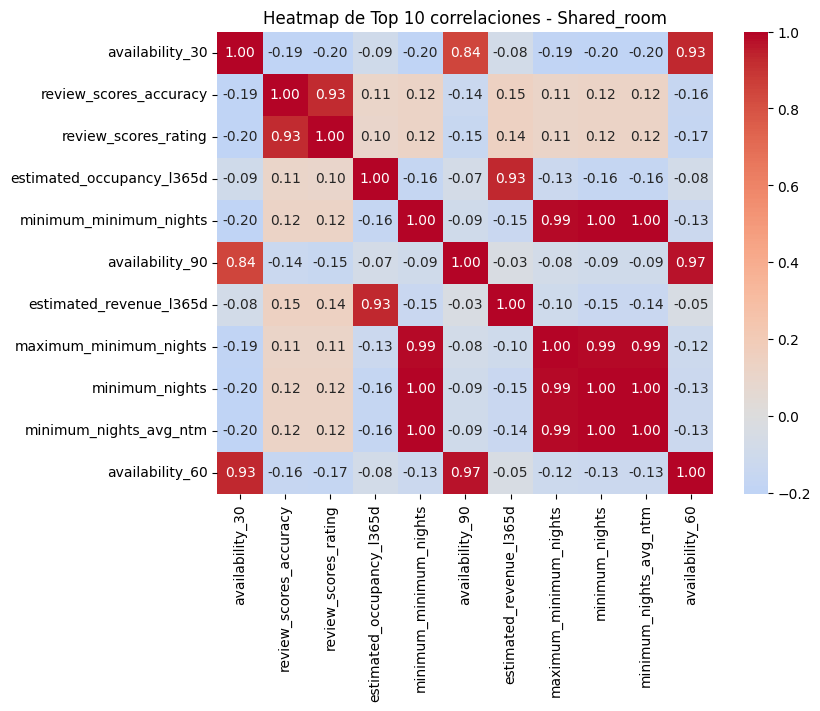


Top 10 correlaciones absolutas - Hotel_room


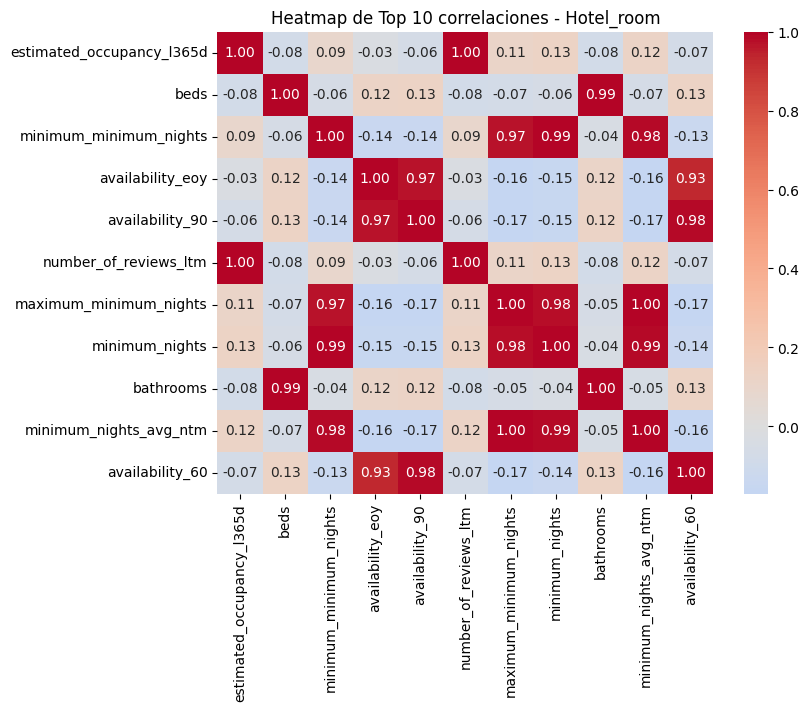

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

subsets = {
    "Entire_home_apt": Entire_home_apt,
    "Private_room": Private_room,
    "Shared_room": Shared_room,
    "Hotel_room": Hotel_room
}

def top10_corr(df):
    # Solo columnas numéricas
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        return pd.DataFrame(columns=["Variable_1","Variable_2","Abs_Correlación"])
    
    corr = num.corr(method="pearson")
    corr_abs = corr.abs()

    # Eliminar duplicados (triángulo superior + diagonal)
    mask = np.triu(np.ones_like(corr_abs, dtype=bool))
    corr_pairs = corr_abs.mask(mask).stack().sort_values(ascending=False)

    # Tomar las 10 más altas
    top10 = corr_pairs.head(10).reset_index()
    top10.columns = ["Variable_1", "Variable_2", "Abs_Correlación"]
    return top10, corr

# Mostrar las tablas y heatmaps para cada subset
top10_dict = {}
for name, sub in subsets.items():
    print("\n" + "="*80)
    print(f"Top 10 correlaciones absolutas - {name}")
    print("="*80)
    
    top10, corr_matrix = top10_corr(sub)
    top10_dict[name] = top10
    #display(top10)

    # Heatmap solo con las variables del Top 10
    vars_top = list(set(top10["Variable_1"]).union(set(top10["Variable_2"])))
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix.loc[vars_top, vars_top], annot=True, cmap="coolwarm", center=0, fmt=".2f")
    plt.title(f"Heatmap de Top 10 correlaciones - {name}")
    plt.show()



REGRESIÓN LINEAL MÚLTIPLE (Punto 6)



Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa: (review_scores_rating, host_acceptance_rate, host_is_superhost, host_total_listings_count, accommodates, bedrooms, Price, review_scores_value, bathrooms y reviews_per_month), y comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor (lineales simples).


<Axes: >

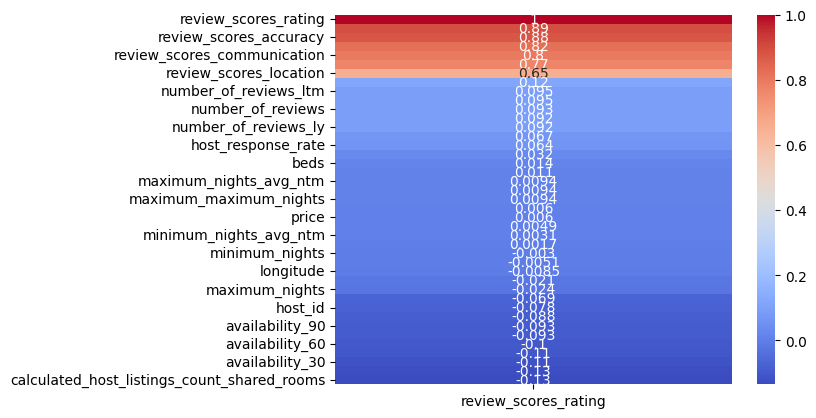

In [175]:
sns.heatmap(df.corr(numeric_only=True)[["review_scores_rating"]].sort_values(by="review_scores_rating", ascending=False), annot=True, cmap="coolwarm")


<Axes: >

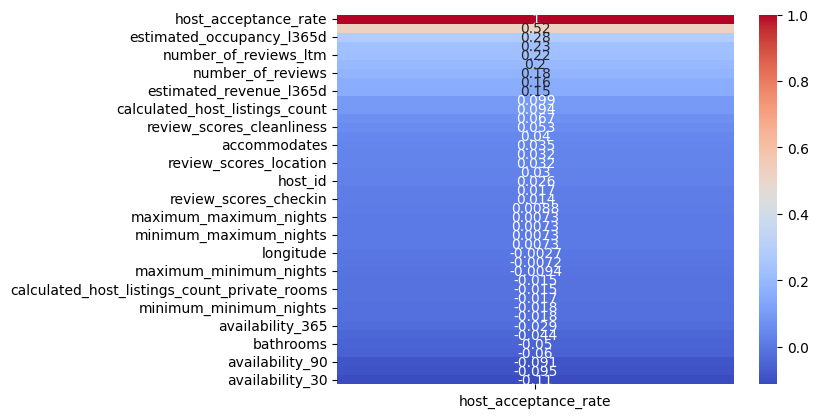

In [176]:
sns.heatmap(df.corr(numeric_only=True)[["host_acceptance_rate"]].sort_values(by="host_acceptance_rate", ascending=False), annot=True, cmap="coolwarm")

In [177]:
df["host_is_superhost"].value_counts()

host_is_superhost
f    16185
t    10216
Name: count, dtype: int64

In [178]:
#t = 1
#f = 0

df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})



<Axes: >

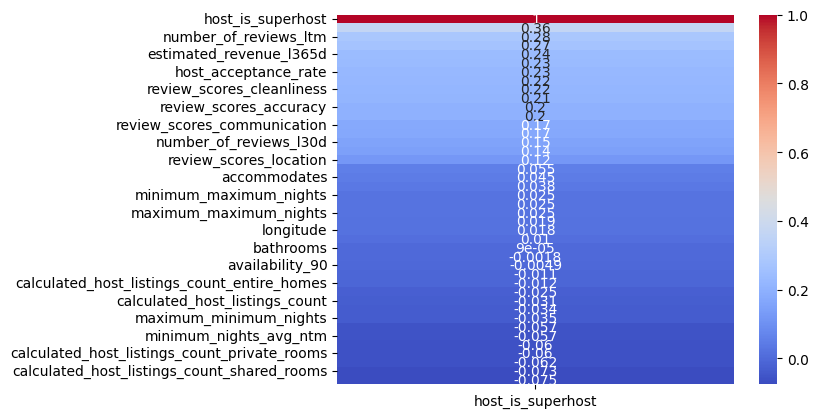

In [179]:
#t = 1
#f = 0

sns.heatmap(df.corr(numeric_only=True)[["host_is_superhost"]].sort_values(by="host_is_superhost", ascending=False), annot=True, cmap="coolwarm")

In [180]:
df["host_total_listings_count"].value_counts()

host_total_listings_count
1.0      4846
2.0      3162
3.0      2121
4.0      1699
5.0      1224
         ... 
83.0        1
595.0       1
75.0        1
124.0       1
645.0       1
Name: count, Length: 116, dtype: int64

In [181]:
print(df.columns[df.columns.str.contains("host_total_listings_count")])


Index(['host_total_listings_count'], dtype='object')


In [182]:
df["host_total_listings_count"].nunique(), df["host_total_listings_count"].unique()[:10]



(116,
 array([1.0, 13.0, 5.0, 4.0, 6.0, 3.0, 8.0, 7.0, 10.0, 2.0], dtype=object))

In [183]:
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors="coerce")

<Axes: >

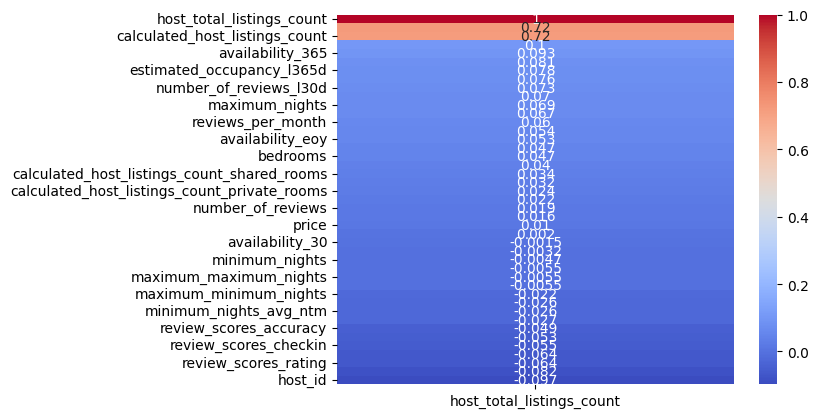

In [184]:
sns.heatmap(df.corr(numeric_only=True)[["host_total_listings_count"]].sort_values(by="host_total_listings_count", ascending=False), annot=True, cmap="coolwarm")

<Axes: >

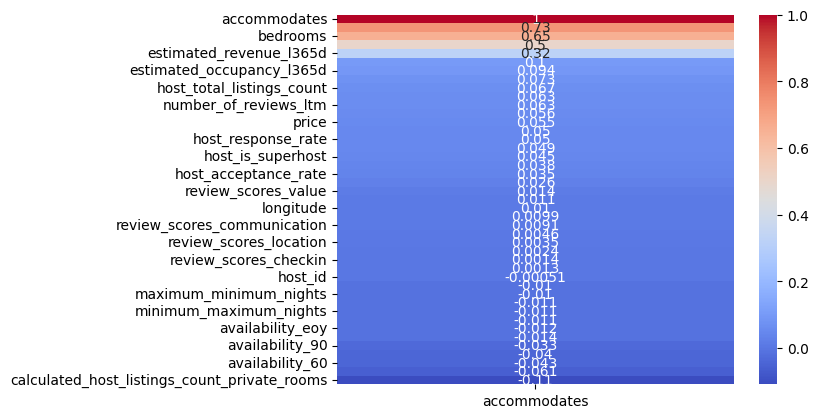

In [185]:
sns.heatmap(df.corr(numeric_only=True)[["accommodates"]].sort_values(by="accommodates", ascending=False), annot=True, cmap="coolwarm")

<Axes: >

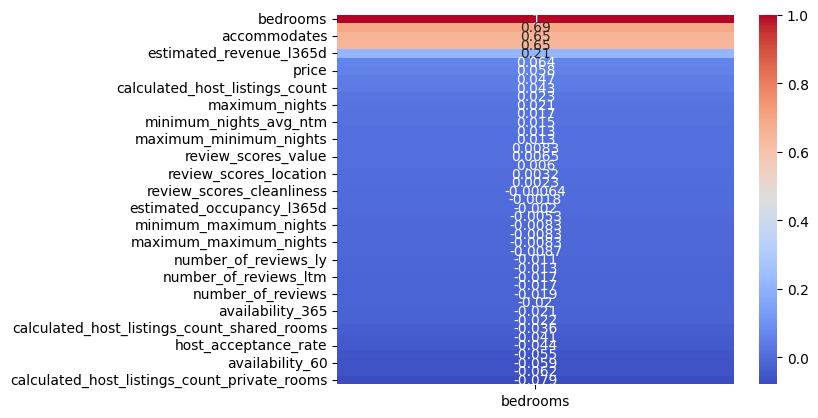

In [186]:
sns.heatmap(df.corr(numeric_only=True)[["bedrooms"]].sort_values(by="bedrooms", ascending=False), annot=True, cmap="coolwarm")

<Axes: >

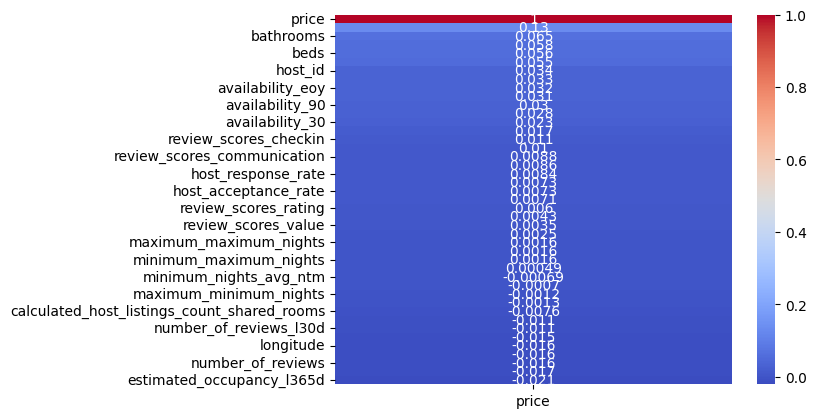

In [187]:
sns.heatmap(df.corr(numeric_only=True)[["price"]].sort_values(by="price", ascending=False), annot=True, cmap="coolwarm")

<Axes: >

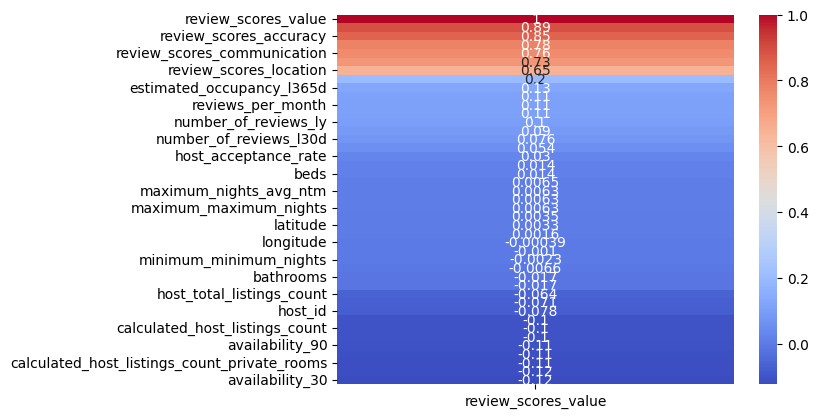

In [188]:
sns.heatmap(df.corr(numeric_only=True)[["review_scores_value"]].sort_values(by="review_scores_value", ascending=False), annot=True, cmap="coolwarm")

<Axes: >

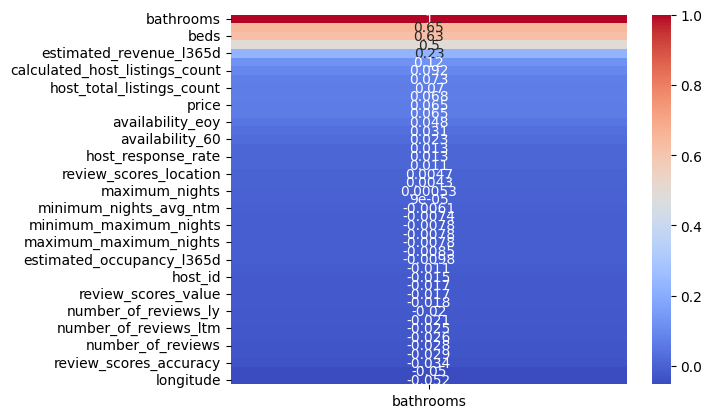

In [189]:
sns.heatmap(df.corr(numeric_only=True)[["bathrooms"]].sort_values(by="bathrooms", ascending=False), annot=True, cmap="coolwarm")

<Axes: >

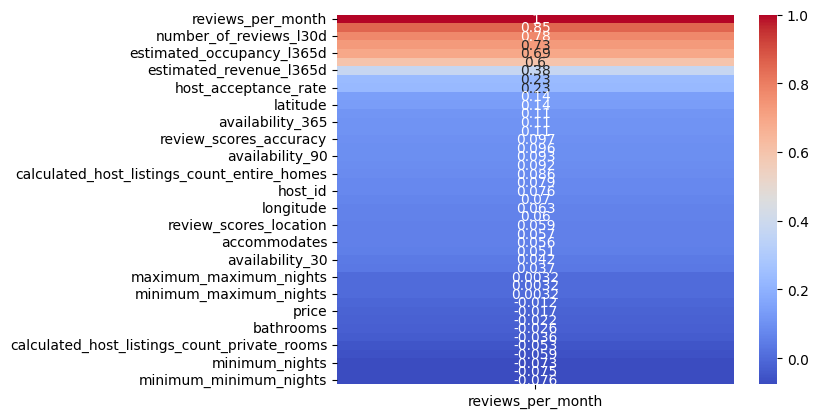

In [190]:
sns.heatmap(df.corr(numeric_only=True)[["reviews_per_month"]].sort_values(by="reviews_per_month", ascending=False), annot=True, cmap="coolwarm")

REGRESIONES LINEALES

1. Y = REVIEW SCORES RATING

In [191]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['review_scores_accuracy', 'review_scores_communication', 'review_scores_location']]
Var_Dep= df['review_scores_rating']

In [192]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [193]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [194]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_accuracy', 'review_scores_communication',
        'review_scores_location'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.61375529, 0.30520342, 0.14391125]),
 'rank_': 3,
 'singular_': array([80.46485672, 31.99150189, 26.62800254]),
 'intercept_': np.float64(-0.35910604070274754)}

**Modelo matemático: y= 0.61375529 x1 + 0.30520342 x2 + 0.14391125 x3 -0.35910604070274754**


In [195]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
R2_1=model.score(Vars_Indep,Var_Dep)
R2_1

0.8209690844064615

In [196]:
R_1=np.sqrt(R2_1)
R_1

np.float64(0.9060734431636662)

In [197]:
#Predecimos los valores 
y_pred= model.predict(X=df[['review_scores_accuracy', 'review_scores_communication', 'review_scores_location']])
y_pred

array([4.77438263, 4.61516845, 4.87170508, ..., 4.77438263, 4.77438263,
       4.77438263], shape=(26401,))

In [198]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred)
df

,Predicciones1,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.774383,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",Within an hour,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,4.615168,Condesa Haus,A new concept of hosting in mexico through a b...,NA,196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,4.871705,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a few hours,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,4.817473,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NA,334451,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within a few hours,...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,4.888145,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NA,170416107,Vicente,2018-01-28,"Mexico City, Mexico","Soy profesionista, mido 1.80, peso 90 kilos,",within an hour,...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,4.774383,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NA,358250534,Inperio,2020-07-24,"Mexico City, Mexico",Hello! I am a marketing specialist. I work for...,within an hour,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,4.774383,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NA,594251711,Guadalupe,2024-08-04,"Mexico City, Mexico","Me encanta conocer gente, viví desde joven fue...",within an hour,...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,4.774383,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NA,24161895,Alexis,2014-11-25,"Mexico City, Mexico","Hi! I'm Alexis, originally from CDMX and passi...",within an hour,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='review_scores_communication', ylabel='review_scores_rating'>

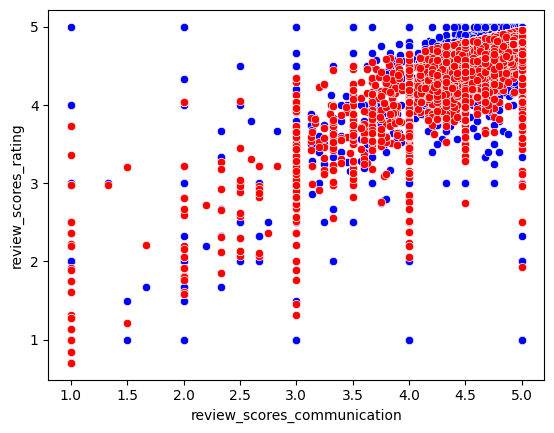

In [199]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='review_scores_rating', color="blue", data=df)
sns.scatterplot(x='review_scores_communication', y='Predicciones1', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

2. HOST ACCEPTANCE RATE

In [200]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= df[['estimated_occupancy_l365d', 'number_of_reviews_ltm','number_of_reviews']]
Var_Dep2= df['host_acceptance_rate']

In [201]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [202]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Var_Dep2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [203]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['estimated_occupancy_l365d', 'number_of_reviews_ltm',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 7.79246673e-04, -4.36041652e-04,  7.08383484e-05]),
 'rank_': 3,
 'singular_': array([18194.60167797,  8797.83159296,  1919.22444287]),
 'intercept_': np.float64(0.8396907343217738)}

**Modelo matemático: y= 7.79246673e-04 x1 + -4.36041652e-04 x2 + 7.08383484e-05 x3 + 0.8396907343217738**

In [204]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2.score(Vars_Indep2,Var_Dep2)

0.08150233510885385

In [205]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred2= model2.predict(X=df[['estimated_occupancy_l365d', 'number_of_reviews_ltm','number_of_reviews']])
y_pred2

array([0.83969073, 0.84853467, 0.86858251, ..., 0.83969073, 0.83969073,
       0.83969073], shape=(26401,))

In [206]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_pred2)
df

,Predicciones2,Predicciones1,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.839691,4.774383,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,0.848535,4.615168,Condesa Haus,A new concept of hosting in mexico through a b...,NA,196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,0.868583,4.871705,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,0.847472,4.817473,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NA,334451,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,0.882957,4.888145,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,0.844001,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NA,170416107,Vicente,2018-01-28,"Mexico City, Mexico","Soy profesionista, mido 1.80, peso 90 kilos,",...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,0.839691,4.774383,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NA,358250534,Inperio,2020-07-24,"Mexico City, Mexico",Hello! I am a marketing specialist. I work for...,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,0.839691,4.774383,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NA,594251711,Guadalupe,2024-08-04,"Mexico City, Mexico","Me encanta conocer gente, viví desde joven fue...",...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,0.839691,4.774383,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NA,24161895,Alexis,2014-11-25,"Mexico City, Mexico","Hi! I'm Alexis, originally from CDMX and passi...",...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='number_of_reviews', ylabel='host_total_listings_count'>

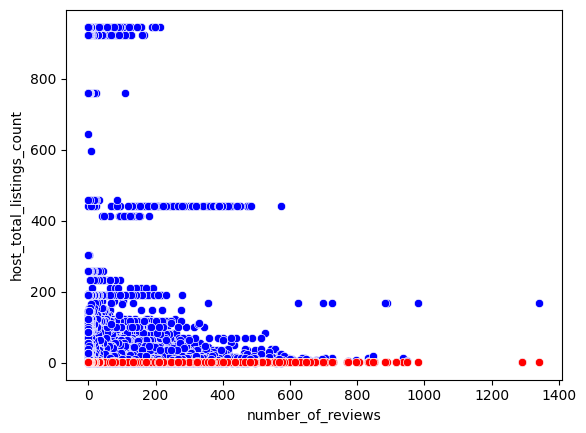

In [207]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Predicciones2', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [208]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
R2_2=model2.score(X=Vars_Indep2, y=Var_Dep2)
R2_2

0.08150233510885385

In [209]:
R_2=np.sqrt(R2_2)
R_2

np.float64(0.28548613820788893)

3. Y = HOST IS SUPERHOST

In [210]:
df["host_is_superhost"].value_counts()

host_is_superhost
0    16185
1    10216
Name: count, dtype: int64

In [211]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= df[['number_of_reviews_ltm', 'estimated_revenue_l365d','host_acceptance_rate']]
Var_Dep3= df['host_is_superhost']

In [212]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [213]:
df["host_is_superhost"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
26396    False
26397    False
26398    False
26399    False
26400    False
Name: host_is_superhost, Length: 26401, dtype: bool

In [214]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Var_Dep3)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [215]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'estimated_revenue_l365d',
        'host_acceptance_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([4.06687011e-03, 2.86775132e-07, 3.42730981e-01]),
 'rank_': 3,
 'singular_': array([3.59073404e+07, 3.31836950e+03, 3.67836360e+01]),
 'intercept_': np.float64(-0.01890536255397851)}

**Modelo matemático: y= 4.06687011e-03x1 + 2.86775132e-07x2 + 3.42730981e-01x3 - 0.01890536255397851**

In [216]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred3= model3.predict(X=df[['number_of_reviews_ltm', 'estimated_revenue_l365d', 'host_acceptance_rate']])
y_pred3

array([0.32039831, 0.32801841, 0.33292539, ..., 0.31354369, 0.32382562,
       0.32039831], shape=(26401,))

In [217]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_pred3)
df

,Predicciones3,Predicciones2,Predicciones1,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.320398,0.839691,4.774383,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",153786,Dici,2010-06-28,"Mexico City, Mexico",...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,0.328018,0.848535,4.615168,Condesa Haus,A new concept of hosting in mexico through a b...,NA,196253,Fernando,2010-08-09,"Mexico City, Mexico",...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,0.332925,0.868583,4.871705,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,265650,Maris,2010-10-19,"Mexico City, Mexico",...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,0.149163,0.847472,4.817473,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NA,334451,Nicholas,2011-01-04,"Mexico City, Mexico",...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,0.318771,0.882957,4.888145,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,Trisha,2010-08-24,"Mexico City, Mexico",...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,0.329751,0.844001,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NA,170416107,Vicente,2018-01-28,"Mexico City, Mexico",...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,0.316971,0.839691,4.774383,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NA,358250534,Inperio,2020-07-24,"Mexico City, Mexico",...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,0.313544,0.839691,4.774383,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NA,594251711,Guadalupe,2024-08-04,"Mexico City, Mexico",...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,0.323826,0.839691,4.774383,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NA,24161895,Alexis,2014-11-25,"Mexico City, Mexico",...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='host_acceptance_rate', ylabel='host_is_superhost'>

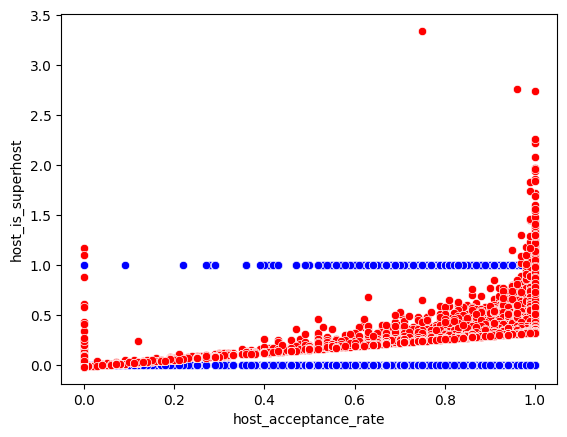

In [218]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="red", data=df)

In [219]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.12198923634436376

In [220]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.3492695754633715)

4. HOST TOTAL LISTING COUNTS

In [221]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep4= df[['calculated_host_listings_count', 'availability_365','estimated_occupancy_l365d']]
Var_Dep4= df['host_total_listings_count']

In [222]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [223]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Var_Dep4)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [224]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count', 'availability_365',
        'estimated_occupancy_l365d'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 2.47805638,  0.00439536, -0.05714438]),
 'rank_': 3,
 'singular_': array([20343.10358361, 14601.44830323,  5305.45398482]),
 'intercept_': np.float64(-0.5569491093855561)}

**Modelo matemático: y= 2.47805638x1 + 0.00439536x2 + -0.05714438x3 + -0.5569491093855561**

In [225]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4.score(Vars_Indep4,Var_Dep4)

0.5220054163253967

In [226]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred4= model4.predict(X=df[['calculated_host_listings_count', 'availability_365','estimated_occupancy_l365d']])
y_pred4

array([ 3.52101946, 22.98502277,  1.69240855, ..., 15.91130137,
        3.41992611,  3.10785533], shape=(26401,))

In [227]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_pred4)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,name,description,neighborhood_overview,host_id,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.521019,0.320398,0.839691,4.774383,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",153786,Dici,2010-06-28,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,22.985023,0.328018,0.848535,4.615168,Condesa Haus,A new concept of hosting in mexico through a b...,NA,196253,Fernando,2010-08-09,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,1.692409,0.332925,0.868583,4.871705,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,265650,Maris,2010-10-19,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,5.229859,0.149163,0.847472,4.817473,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NA,334451,Nicholas,2011-01-04,...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,5.061711,0.318771,0.882957,4.888145,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,Trisha,2010-08-24,...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,3.156176,0.329751,0.844001,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NA,170416107,Vicente,2018-01-28,...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,35.735752,0.316971,0.839691,4.774383,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NA,358250534,Inperio,2020-07-24,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,15.911301,0.313544,0.839691,4.774383,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NA,594251711,Guadalupe,2024-08-04,...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,3.419926,0.323826,0.839691,4.774383,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NA,24161895,Alexis,2014-11-25,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='availability_365', ylabel='host_total_listings_count'>

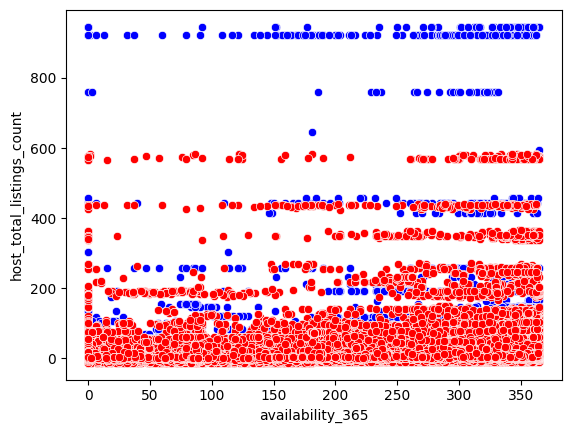

In [228]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='availability_365', y='Predicciones4', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones4', color="red", data=df)

In [229]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
R2_4=model4.score(X=Vars_Indep4, y=Var_Dep4)
R2_4

0.5220054163253967

In [230]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
R_4=np.sqrt(R2_4)
R_4

np.float64(0.7224994230623278)

5. ACCOMMODATES

In [231]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep5= df[['bedrooms', 'estimated_revenue_l365d','estimated_occupancy_l365d']]
Var_Dep5= df['accommodates']

In [232]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [233]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Var_Dep5)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [234]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'estimated_revenue_l365d', 'estimated_occupancy_l365d'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.14248672e+00,  2.07650442e-06, -3.43970933e-04]),
 'rank_': 3,
 'singular_': array([3.59073413e+07, 1.23163369e+04, 1.96838554e+02]),
 'intercept_': np.float64(1.3713874162003425)}

**Modelo matemático: y= 1.14248672e+00x1 + 2.07650442e-06x2 - 3.43970933e-04x3 + 1.3713874162003425**

In [235]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred5= model5.predict(X=df[['bedrooms', 'estimated_revenue_l365d', 'estimated_occupancy_l365d']])
y_pred5

array([2.51387414, 7.30601967, 2.53999766, ..., 3.65636086, 2.51387414,
       4.79884757], shape=(26401,))

In [236]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_pred5)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,name,description,neighborhood_overview,host_id,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.513874,3.521019,0.320398,0.839691,4.774383,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",153786,Dici,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,7.306020,22.985023,0.328018,0.848535,4.615168,Condesa Haus,A new concept of hosting in mexico through a b...,NA,196253,Fernando,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,2.539998,1.692409,0.332925,0.868583,4.871705,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,265650,Maris,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,3.675428,5.229859,0.149163,0.847472,4.817473,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NA,334451,Nicholas,...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,2.597434,5.061711,0.318771,0.882957,4.888145,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,Trisha,...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,3.667753,3.156176,0.329751,0.844001,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NA,170416107,Vicente,...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,2.513874,35.735752,0.316971,0.839691,4.774383,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NA,358250534,Inperio,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,3.656361,15.911301,0.313544,0.839691,4.774383,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NA,594251711,Guadalupe,...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,2.513874,3.419926,0.323826,0.839691,4.774383,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NA,24161895,Alexis,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='estimated_revenue_l365d', ylabel='accommodates'>

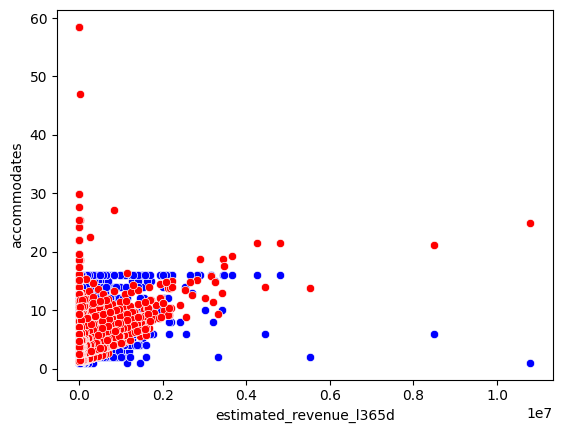

In [237]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='estimated_revenue_l365d', y='accommodates', color="blue", data=df)
sns.scatterplot(x='estimated_revenue_l365d', y='Predicciones5', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones5', color="red", data=df)

In [238]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
R2_5=model5.score(X=Vars_Indep5, y=Var_Dep5)
R2_5

0.4624068508565935

In [239]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
R_5=np.sqrt(R2_5)
R_5

np.float64(0.6800050373758958)

6. BEDROOMS

In [240]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep6= df[['accommodates', 'estimated_revenue_l365d','price']]
Var_Dep6= df['bedrooms']

In [241]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [242]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Var_Dep6)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [243]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'estimated_revenue_l365d', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([3.49842606e-01, 1.34776234e-08, 1.57696262e-06]),
 'rank_': 3,
 'singular_': array([3.59092625e+07, 2.79083584e+06, 3.60008431e+02]),
 'intercept_': np.float64(0.3652002456154815)}

**Modelo matemático: y= 3.59092625e+07x1 + 2.79083584e+06x2 + 3.60008431e+02x3 + 0.3652002456154815**

In [244]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6.score(Vars_Indep6,Var_Dep6)

0.4288762805278892

In [245]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred6= model6.predict(X=df[['accommodates', 'estimated_revenue_l365d','price']])
y_pred6

array([1.07087634, 5.29283763, 1.06604451, ..., 1.76711273, 1.06587421,
       2.46909715], shape=(26401,))

In [246]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_pred6)
df

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,name,description,neighborhood_overview,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.070876,2.513874,3.521019,0.320398,0.839691,4.774383,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",153786,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,5.292838,7.306020,22.985023,0.328018,0.848535,4.615168,Condesa Haus,A new concept of hosting in mexico through a b...,NA,196253,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,1.066045,2.539998,1.692409,0.332925,0.868583,4.871705,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,265650,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,1.767382,3.675428,5.229859,0.149163,0.847472,4.817473,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NA,334451,...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,1.067118,2.597434,5.061711,0.318771,0.882957,4.888145,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,2.466046,3.667753,3.156176,0.329751,0.844001,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NA,170416107,...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,1.066434,2.513874,35.735752,0.316971,0.839691,4.774383,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NA,358250534,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,1.767113,3.656361,15.911301,0.313544,0.839691,4.774383,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NA,594251711,...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,1.065874,2.513874,3.419926,0.323826,0.839691,4.774383,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NA,24161895,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='price', ylabel='bedrooms'>

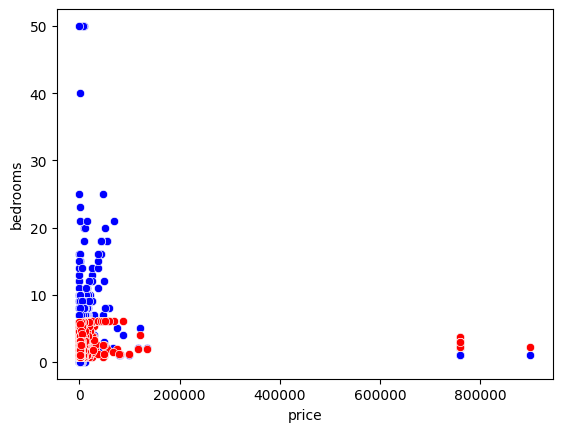

In [247]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price', y='bedrooms', color="blue", data=df)
sns.scatterplot(x='price', y='Predicciones6', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones6', color="red", data=df)

In [248]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
R2_6=model6.score(X=Vars_Indep6, y=Var_Dep6)
R2_6

0.4288762805278892

In [249]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
R_6=np.sqrt(R2_6)
R_6

np.float64(0.654886463845367)

7. Y = PRICE

In [250]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep7= df[['bathrooms', 'beds','availability_eoy']]
Var_Dep7= df['price']

In [251]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [252]:
#Ajustamos el modelo con las variables antes declaradas
model7.fit(X=Vars_Indep7, y=Var_Dep7)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [253]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'beds', 'availability_eoy'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([866.75813262, 244.22342904,   7.44405138]),
 'rank_': 3,
 'singular_': array([10553.81599079,   292.41926924,   115.07428221]),
 'intercept_': np.float64(-840.977772308247)}

**Modelo matemático: y= 866.75813262x1 + 244.22342904x2 + 7.44405138x3 + -840.977772308247**

In [254]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model7.score(Vars_Indep7,Var_Dep7)

0.005384723965376481

In [255]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred7= model7.predict(X=df[['bathrooms', 'beds','availability_eoy']])
y_pred7

array([1669.48544912, 7212.46458677, 1438.71985629, ..., 1876.48862126,
       1705.27543948, 2994.9142343 ], shape=(26401,))

In [256]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones7', y_pred7)
df

,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,name,description,neighborhood_overview,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1669.485449,1.070876,2.513874,3.521019,0.320398,0.839691,4.774383,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,7212.464587,5.292838,7.306020,22.985023,0.328018,0.848535,4.615168,Condesa Haus,A new concept of hosting in mexico through a b...,NA,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,1438.719856,1.066045,2.539998,1.692409,0.332925,0.868583,4.871705,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,1236.300202,1.767382,3.675428,5.229859,0.149163,0.847472,4.817473,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NA,...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,999.520825,1.067118,2.597434,5.061711,0.318771,0.882957,4.888145,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,2083.491793,2.466046,3.667753,3.156176,0.329751,0.844001,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,NA,...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,1669.485449,1.066434,2.513874,35.735752,0.316971,0.839691,4.774383,CDMX | Business Class Flat,Experience elevated business travel in our bea...,NA,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,1876.488621,1.767113,3.656361,15.911301,0.313544,0.839691,4.774383,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",NA,...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,1705.275439,1.065874,2.513874,3.419926,0.323826,0.839691,4.774383,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,NA,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='bathrooms', ylabel='price'>

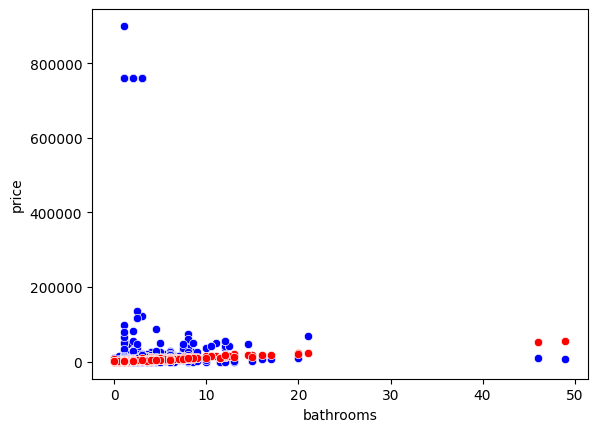

In [257]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms', y='price', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones7', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones7', color="red", data=df)

In [258]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
R2_7=model7.score(X=Vars_Indep7, y=Var_Dep7)
R2_7

0.005384723965376481

In [259]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
R_7=np.sqrt(R2_7)
R_7

np.float64(0.07338067841997975)

8. Y = REVIEW SCORES VALUE

In [260]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep8= df[['review_scores_accuracy', 'review_scores_communication','review_scores_location']]
Var_Dep8= df['review_scores_value']

In [261]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [262]:
#Ajustamos el modelo con las variables antes declaradas
model8.fit(X=Vars_Indep8, y=Var_Dep8)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [263]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_accuracy', 'review_scores_communication',
        'review_scores_location'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.62876426, 0.24733375, 0.19079093]),
 'rank_': 3,
 'singular_': array([80.46485672, 31.99150189, 26.62800254]),
 'intercept_': np.float64(-0.41327890127197175)}

**Modelo matemático: y= 0.62876426x1 + 0.24733375x2 + 0.19079093x3 - 0.41327890127197175**

In [264]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model8.score(Vars_Indep8,Var_Dep8)

0.765328267843927

In [265]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred8= model8.predict(X=df[['review_scores_accuracy', 'review_scores_communication','review_scores_location']])
y_pred8

array([4.7341989 , 4.58628029, 4.82909774, ..., 4.7341989 , 4.7341989 ,
       4.7341989 ], shape=(26401,))

In [266]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones8', y_pred8)
df

,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,name,description,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.734199,1669.485449,1.070876,2.513874,3.521019,0.320398,0.839691,4.774383,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,4.586280,7212.464587,5.292838,7.306020,22.985023,0.328018,0.848535,4.615168,Condesa Haus,A new concept of hosting in mexico through a b...,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,4.829098,1438.719856,1.066045,2.539998,1.692409,0.332925,0.868583,4.871705,Great space in historical San Rafael,This great apartment is located in one of the ...,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,4.784386,1236.300202,1.767382,3.675428,5.229859,0.149163,0.847472,4.817473,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,4.851999,999.520825,1.067118,2.597434,5.061711,0.318771,0.882957,4.888145,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,4.730375,2083.491793,2.466046,3.667753,3.156176,0.329751,0.844001,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,New 60-meter luxury apartment with two spaciou...,...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,4.734199,1669.485449,1.066434,2.513874,35.735752,0.316971,0.839691,4.774383,CDMX | Business Class Flat,Experience elevated business travel in our bea...,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,4.734199,1876.488621,1.767113,3.656361,15.911301,0.313544,0.839691,4.774383,Corazón CDMX Roma norte/Reforma,"Apartment in the heart of Mexico City, 2 minut...",...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,4.734199,1705.275439,1.065874,2.513874,3.419926,0.323826,0.839691,4.774383,Chic Loft + Lap Pool & Gym,Stay in a chic loft inside a restored historic...,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='review_scores_communication', ylabel='review_scores_value'>

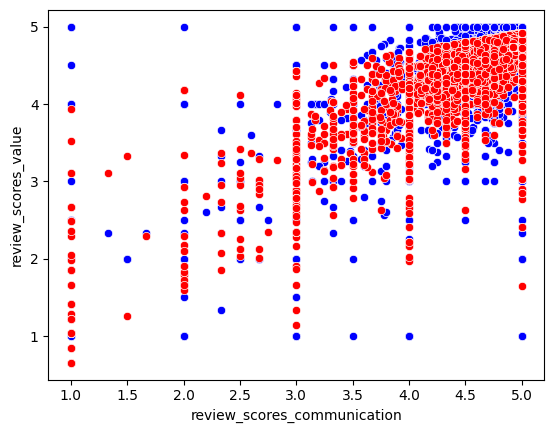

In [267]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='review_scores_value', color="blue", data=df)
sns.scatterplot(x='review_scores_communication', y='Predicciones8', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones8', color="red", data=df)

In [268]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
R2_8=model8.score(X=Vars_Indep8, y=Var_Dep8)
R2_8

0.765328267843927

In [269]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
R_8=np.sqrt(R2_8)
R_8

np.float64(0.8748304223356245)

9. Y = BATHROOMS

In [270]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep9= df[['beds', 'estimated_revenue_l365d','calculated_host_listings_count']]
Var_Dep9= df['bathrooms']

In [271]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model9= LinearRegression()

In [272]:
#Ajustamos el modelo con las variables antes declaradas
model9.fit(X=Vars_Indep9, y=Var_Dep9)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [273]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds', 'estimated_revenue_l365d',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([3.56076754e-01, 2.48492075e-07, 1.62727561e-03]),
 'rank_': 3,
 'singular_': array([3.59073404e+07, 5.35120155e+03, 2.61995997e+02]),
 'intercept_': np.float64(0.689092667807355)}

**Modelo matemático: y= 3.56076754e-01x1 + 2.48492075e-07x2 + 1.62727561e-03x3 + 0.689092667807355**

In [274]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred9= model9.predict(X=df[['beds', 'estimated_revenue_l365d','calculated_host_listings_count']])
y_pred9

array([1.0467967 , 3.57918932, 1.05115773, ..., 1.41100983, 1.40287345,
       1.75895021], shape=(26401,))

In [275]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones9', y_pred9)
df

,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.046797,4.734199,1669.485449,1.070876,2.513874,3.521019,0.320398,0.839691,4.774383,Villa Dante,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,3.579189,4.586280,7212.464587,5.292838,7.306020,22.985023,0.328018,0.848535,4.615168,Condesa Haus,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,1.051158,4.829098,1438.719856,1.066045,2.539998,1.692409,0.332925,0.868583,4.871705,Great space in historical San Rafael,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,1.407029,4.784386,1236.300202,1.767382,3.675428,5.229859,0.149163,0.847472,4.817473,"2 bedroom apt. deco bldg, Condesa",...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,1.062027,4.851999,999.520825,1.067118,2.597434,5.061711,0.318771,0.882957,4.888145,Beautiful light Studio Coyoacan- full equipped !,...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,1.760560,4.730375,2083.491793,2.466046,3.667753,3.156176,0.329751,0.844001,4.811333,Central 68 Arena CDMX Aduana Pantaco Ind Vallejo,...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,1.067951,4.734199,1669.485449,1.066434,2.513874,35.735752,0.316971,0.839691,4.774383,CDMX | Business Class Flat,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,1.411010,4.734199,1876.488621,1.767113,3.656361,15.911301,0.313544,0.839691,4.774383,Corazón CDMX Roma norte/Reforma,...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,1.402873,4.734199,1705.275439,1.065874,2.513874,3.419926,0.323826,0.839691,4.774383,Chic Loft + Lap Pool & Gym,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='beds', ylabel='bathrooms'>

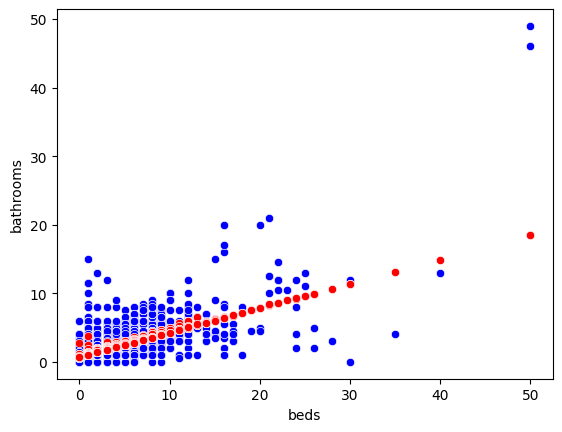

In [276]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='beds', y='bathrooms', color="blue", data=df)
sns.scatterplot(x='beds', y='Predicciones9', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones9', color="red", data=df)

In [277]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
R2_9=model9.score(X=Vars_Indep9, y=Var_Dep9)
R2_9

0.39804497349707746

In [278]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
R_9=np.sqrt(R2_9)
R_9

np.float64(0.6309080547093034)

10. REVIEWS PER MONTH

In [279]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep10= df[['number_of_reviews_l30d', 'estimated_occupancy_l365d','estimated_revenue_l365d']]
Var_Dep10= df['reviews_per_month']

In [280]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model10= LinearRegression()

In [281]:
#Ajustamos el modelo con las variables antes declaradas
model10.fit(X=Vars_Indep10, y=Var_Dep10)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [282]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_l30d', 'estimated_occupancy_l365d',
        'estimated_revenue_l365d'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 5.79208374e-01,  9.22282145e-03, -3.37721715e-08]),
 'rank_': 3,
 'singular_': array([3.59073413e+07, 1.23171759e+04, 2.89463711e+02]),
 'intercept_': np.float64(0.2011540905359377)}

**Modelo matemático: y= 5.79208374e-01 x1 + 9.22282145e-03 x2 - 3.37721715e-08 x3 + 0.0.2011540905359377**

In [283]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred10= model10.predict(X=df[['number_of_reviews_l30d', 'estimated_occupancy_l365d','estimated_revenue_l365d']])
y_pred10

array([0.20115409, 0.25284362, 0.47724603, ..., 0.20115409, 0.20115409,
       0.20115409], shape=(26401,))

In [284]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones10', y_pred10)
df

,Predicciones10,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.201154,1.046797,4.734199,1669.485449,1.070876,2.513874,3.521019,0.320398,0.839691,4.774383,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0
1,0.252844,3.579189,4.586280,7212.464587,5.292838,7.306020,22.985023,0.328018,0.848535,4.615168,...,4.87,4.78,4.980000,4.470000,f,9,4,2,0,0
2,0.477246,1.051158,4.829098,1438.719856,1.066045,2.539998,1.692409,0.332925,0.868583,4.871705,...,4.98,4.94,4.760000,4.790000,f,1,1,0,0,0
3,0.256147,1.407029,4.784386,1236.300202,1.767382,3.675428,5.229859,0.149163,0.847472,4.817473,...,4.94,4.92,4.980000,4.920000,f,2,2,0,0,0
4,0.642222,1.062027,4.851999,999.520825,1.067118,2.597434,5.061711,0.318771,0.882957,4.888145,...,4.96,4.98,4.960000,4.920000,f,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,0.835481,1.760560,4.730375,2083.491793,2.466046,3.667753,3.156176,0.329751,0.844001,4.811333,...,4.00,5.00,4.000000,5.000000,t,1,1,0,0,1
26397,0.201154,1.067951,4.734199,1669.485449,1.066434,2.513874,35.735752,0.316971,0.839691,4.774383,...,4.92,4.92,4.840647,4.713399,t,14,14,0,0,0
26398,0.201154,1.411010,4.734199,1876.488621,1.767113,3.656361,15.911301,0.313544,0.839691,4.774383,...,4.92,4.92,4.840647,4.713399,f,6,3,3,0,0
26399,0.201154,1.402873,4.734199,1705.275439,1.065874,2.513874,3.419926,0.323826,0.839691,4.774383,...,4.92,4.92,4.840647,4.713399,f,1,1,0,0,0


<Axes: xlabel='estimated_occupancy_l365d', ylabel='reviews_per_month'>

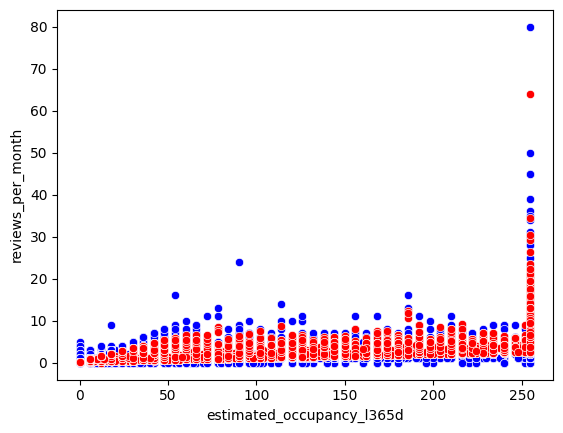

In [285]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='estimated_occupancy_l365d', y='reviews_per_month', color="blue", data=df)
sns.scatterplot(x='estimated_occupancy_l365d', y='Predicciones10', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones10', color="red", data=df)

In [286]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
R2_10=model10.score(X=Vars_Indep10, y=Var_Dep10)
R2_10

0.7165727351746807

In [287]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
R_10=np.sqrt(R2_10)
R_10

np.float64(0.8465061932287801)